In [2]:
import matplotlib
matplotlib.use('Agg')

from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
#import seawater.gibbs as gsw

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Read the file.txt with pandas

In [3]:
data = pd.read_csv('/home/mgrenier/Documents/GEOTRACES_ARCTIC/GEOTRACES2015-Legs2b3b_ODV_forPaTh.txt',sep='\t')
#data
#data.head() # Displays the head of the table
#data.tail() # Displays the tail of the table

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,10,24,26,27,28,29,31,32,33,34,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Rename and redefine variables

In [4]:
data.rename(columns={'yyyy-mm-ddThh:mm:ss.ss':'date',
                     'Longitude [degrees_east]':'lon','Latitude [degrees_north]':'lat',
                     'Bot. Depth [m]':'z_bottom','PRES_01 [decibars]':'P','Depth [metres]':'d',
                     'TE90_01 [degrees C]':'temp','PSAL_01 [psu]':'sal','SIGT_01 [kg/m**3]':'dens',
                     '231-Pa (fg/kg)':'Pa','230-Th (fg/kg)':'Th'}, inplace= True)

# Define the number of columns and rows to display
pd.options.display.max_columns = 64
pd.options.display.max_columns = 94

#data.head(n=2) # Displays the 2 first rows of the head of the table
#data.tail(n=2) # Displays the 2 first rows of the tail of the table

# Redefine the variables with a handy name
station = data.Station
date = data.date
lon = data.lon
lat = data.lat
P = data.P
d = data.d
t = data.temp
s = data.sal

print(t.values,s.values,d.values,'\n') # Returns Series as ndarray or ndarray-like depending on the dtype 
                           # Quotes around the numbers indicate that the type is an object, not a float

['6.327' '6.3266' '6.326' ..., -1.177 -1.176 -1.176] ['33.3184' '33.3171' '33.3176' ..., 32.804 32.808 32.811] [   6.94     7.932    8.924 ...,  139.493  140.482  141.471] 



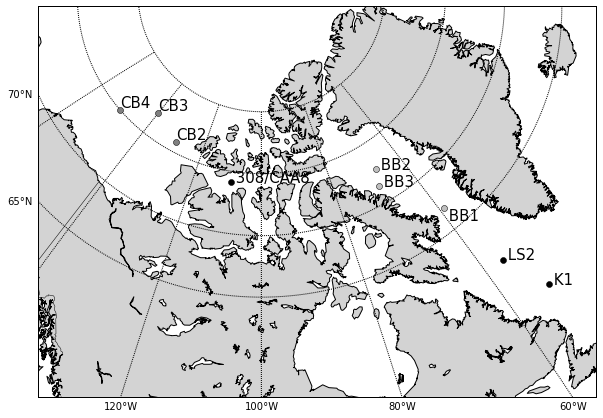

In [5]:
### Draw the map for the location of the Pa Th stations
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

currentStation=[]
previousStation=currentStation

for i in range(0,len(data.lon),1):
    longi,lati= m(data.lon[i],data.lat[i])
    if data.Pa[i] >= 0: 
        # print(data.Station[i])
        currentStation=data.Station[i]
        
        if currentStation != previousStation: 
            previousStation=currentStation
            if (currentStation == 'K1' or currentStation == 'LS2' or currentStation == '308/CAA8'):
                plt.plot(longi,lati,'o',color='k')
                ax.annotate(' '+data.Station[i],xy=(longi,lati),fontsize=15)
            if (currentStation == 'BB1'):
                plt.plot(longi,lati,'o',color='0.75')
                ax.annotate(' '+data.Station[i],xy=(longi,lati),verticalalignment='top',fontsize=15)
            if (currentStation == 'BB2' or currentStation == 'BB3'):
                plt.plot(longi,lati,'o',color='0.75')
                ax.annotate(' '+data.Station[i],xy=(longi,lati),fontsize=15)
            if (currentStation == 'CB2' or currentStation == 'CB3' or currentStation == 'CB4'):
                plt.plot(longi,lati,'o',color='0.5')
                #ax.annotate(' '+data.Station[i]+'\n',xy=(longi,lati),verticalalignment='bottom',fontsize=15)
                ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
            
savefig('Figures/PaThStationsGreyPal_Map.pdf',bbox_inches='tight')
savefig('Figures/PaThStationsGreyPal_Map.png',bbox_inches='tight')

plt.show()

pl.dump( ax, open('PaThStationsGreyPal_Map.pickle', 'wb'), fix_imports=True )

#cmap = plt.get_cmap('jet')



